In [67]:
import pandas as pd
import os

def load_diamond_data():
    csv_path = os.path.join("diamonds-dataset", "diamonds-train.csv")
    return pd.read_csv(csv_path)

In [68]:
#Carrega os dados de treino e faz feature scaling(depth, table)
import numpy as np
diamond_data = load_diamond_data()
diamond_data["depth"] = (diamond_data["depth"] / 10)
diamond_data["table"] = (diamond_data["table"] / 10)

In [69]:
#dummy coding(cut,color,clarity)
from sklearn.preprocessing import LabelEncoder
diamond_data = load_diamond_data()
diamond_data["depth"] = diamond_data["depth"] / 10
diamond_data["table"] = diamond_data["table"] / 10

enumValues = {"cut": {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4},
              "color": {"J": 0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6},
              "clarity": {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4,"VVS2":5, "VVS1":6, "IF":7}}
diamond_data.replace(enumValues, inplace=True)


In [70]:
# Normal Equation

def NormalEquation(X, y):

    transpose = X.T

    mult1 = transpose.dot(X)

    try:
        inverse = np.linalg.inv(mult1)

    except np.linalg.LinAlgError:
        print("Not invertible")
        return np.zeros(1,1)

    else:
        mult2 = (inverse.dot(transpose)).dot(y)
        return mult2


In [71]:
import numpy as np

#function add a first column filled with 1's and delete de last colum
def prepareSet(setToPrepare):
    X = np.array(setToPrepare)

    X = np.delete(X, -1, axis=1)

    X = np.c_[np.ones((len(X), 1)),X]

    y = np.array(setToPrepare["price"])

    return X,y

In [72]:
#grafico Carat X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["carat"], diamond_data["price"])
plt.xlabel("$carat$", fontsize=18)
plt.ylabel("$price(U$)$", fontsize=18)
plt.show()

<Figure size 640x480 with 1 Axes>

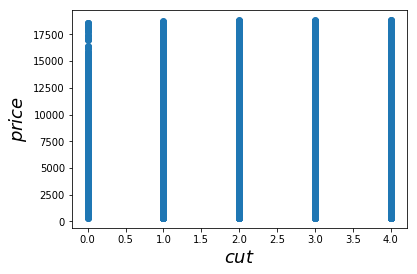

In [73]:
#grafico Cut X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["cut"], diamond_data["price"])
plt.xlabel("$cut$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

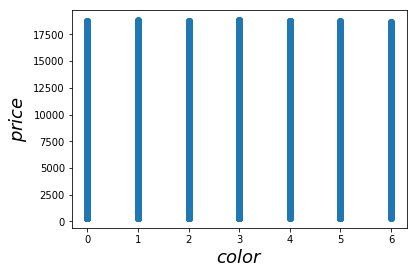

In [74]:
#grafico  Color X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["color"], diamond_data["price"])
plt.xlabel("$color$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

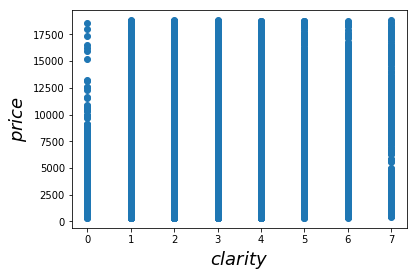

In [75]:
#grafico Clarity X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["clarity"], diamond_data["price"])
plt.xlabel("$clarity$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

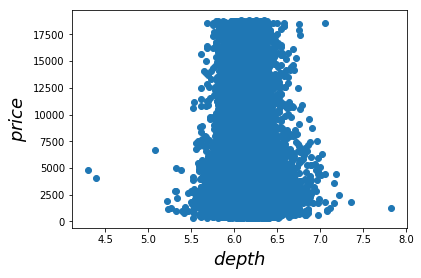

In [76]:
#grafico Depth X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["depth"], diamond_data["price"])
plt.xlabel("$depth$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

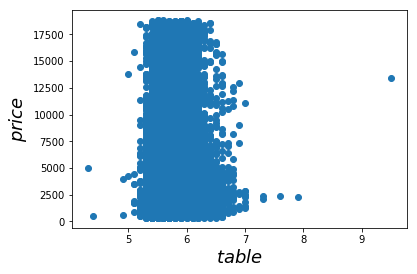

In [77]:
#grafico table X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["table"], diamond_data["price"])
plt.xlabel("$table$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

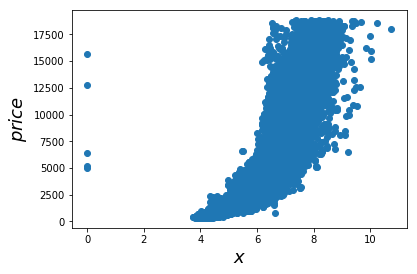

In [78]:
#grafico x X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["x"], diamond_data["price"])
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

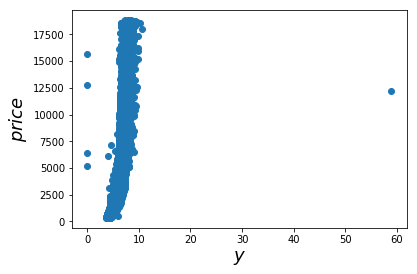

In [79]:
#grafico y X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["y"], diamond_data["price"])
plt.xlabel("$y$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

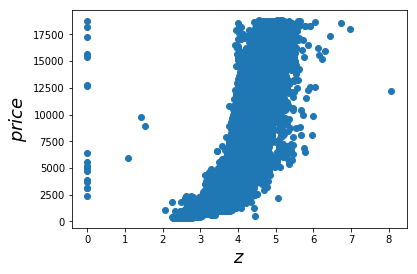

In [80]:
#grafico z X Price
import matplotlib.pyplot as plt
plt.scatter(diamond_data["z"], diamond_data["price"])
plt.xlabel("$z$", fontsize=18)
plt.ylabel("$price$", fontsize=18)
plt.show()

In [181]:
import numpy as np
#Linear Regression using batch gradient descent
#ex n_iterations = 10000, learning_rate = 0.1
def LinRegBatchGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATIONS, LEARNING_RATE):
    theta = np.random.randn(10,1) #random initialization
    m = TRAIN_SET.shape[0]
    for iteration in range(N_ITERATIONS):
        gradients = 2/m * TRAIN_SET.T.dot(TRAIN_SET.dot(theta) - TARGET_SET)
        theta = theta - LEARNING_RATE * gradients
    return theta

In [116]:
# Cross Validation Generation

X ,y = prepareSet(diamond_data) 

from sklearn.model_selection import train_test_split, KFold

def generate_sets(type='kfold'):

    # Cross validation using train_test_split
    if (type == 'split'):
       return train_test_split(X,y,test_size=0.2,random_state=0)

    # Cross validation using K-Fold
    # K = 5, Shuffle = true, Seed = 21
    elif (type == 'kfold'):
        kfold_seed = 21

        kfold = KFold(n_splits=5, shuffle=True, random_state=kfold_seed)
        return kfold.split(X,y)
        # for train_index, test_index in kfold.split(X, y):
        #     X_train, X_test = X[train_index], X[test_index]
        #     y_train, y_test = y[train_index], y[test_index]
        #     print("TRAIN:", X_train.shape, "TEST:", X_test.shape)
        #     print("TEST:", y_train.shape, "TEST:", y_test.shape)

In [17]:
#Scikit-Learn Linear Regression using Stochastic Gradient Descent(SGD) for comparisson
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 100, eta0=0.1)
sgd_reg.fit(X_train, y_train)
sgd_reg.intercept_, sgd_reg.coef_


(array([-4.11402088e+08]),
 array([ 57426549.02754363, -11527163.2411661 ,   1749706.88898905,
           207641.88114456,    294807.94712161,   7933238.17878862,
         15427945.76928742, -29704850.02770425,  41457709.15394574,
         12559344.46015995]))

In [182]:
for train_index, validate_index in generate_sets():
    X_train, X_test = X[train_index], X[validate_index]
    y_train, y_test = y[train_index], y[validate_index]
    print(LinRegBatchGradientDescent(X_train,y_train.reshape(len(y_train),1),100,0.1))

[[-1.33092930e+156]
 [-1.10195776e+156]
 [-3.87793100e+156]
 [-4.55703049e+156]
 [-4.04600029e+156]
 [-7.72637336e+156]
 [-7.73333828e+156]
 [-4.76898323e+156]
 [-8.21698018e+156]
 [-7.64882034e+156]]
[[-1.38100984e+156]
 [-1.14459647e+156]
 [-4.02686610e+156]
 [-4.73832168e+156]
 [-4.18764857e+156]
 [-8.01950443e+156]
 [-8.02673778e+156]
 [-4.94914972e+156]
 [-8.52598346e+156]
 [-7.93723094e+156]]
[[-1.33396666e+156]
 [-1.10417912e+156]
 [-3.88545173e+156]
 [-4.55986041e+156]
 [-4.07051842e+156]
 [-7.74254611e+156]
 [-7.74939379e+156]
 [-4.77879551e+156]
 [-8.23579855e+156]
 [-7.66700582e+156]]
[[-1.36602192e+156]
 [-1.13209239e+156]
 [-3.97680156e+156]
 [-4.67403927e+156]
 [-4.16050890e+156]
 [-7.93245556e+156]
 [-7.93415962e+156]
 [-4.89578924e+156]
 [-8.43386223e+156]
 [-7.85248215e+156]]
[[-1.46451562e+156]
 [-1.21565913e+156]
 [-4.27116226e+156]
 [-5.01814895e+156]
 [-4.45018537e+156]
 [-8.50904404e+156]
 [-8.51651889e+156]
 [-5.25102857e+156]
 [-9.04039063e+156]
 [-8.41719215e+1

In [ ]:
def learning_schedule(t):
    return t0 / (t + t1)
#TODO
#implementation Linear Regression using Stochastick Gradient Descent(SGD)
def LinRegStochasticGradientDescent(TRAIN_SET, TARGET_SET, N_EPOCHS, LEARNING_RATE):
    t0, t1 = 5, 50  # learning schedule hyperparameters
    theta = np.random.randn(len(TRAIN_SET),1)  # random initialization
    for epoch in range(N_EPOCHS):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = TRAIN_SET[random_index:random_index+1]
            yi = TARGET_SET[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            #eta = learning_schedule(epoch * m + i)
            #theta = theta - eta * gradients
            theta = theta - LEARNING_RATE * gradients

In [ ]:
#implementation Linear Regression using Mini-Batch Gradient Descent
def LinRegMiniGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATION, LEARNING_RATE, SIZE_BATCH):
    np.random.seed(42)
    theta = np.random.randn(10,1) #random initialization
    for iteration in range(N_ITERATIONS):
        shuffle_indices = np.random.permutation(TRAIN_SET.shape[0])
        train_shuffled = TRAIN_SET[shuffled_indices]
        target_shuffled = TARGET_SET[shuffled_indices]
        for i in range(0,TARGET_SET.shape[0], SIZE_BATCH):
            xi = train_shuffled[i:i+SIZE_BATCH]
            yi = target_shuffled[i:i+SIZE_BATCH]
            gradients = 2/SIZE_BATCH * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - LEARNING_RATE * gradients
    return theta

In [ ]:
a = np.array([1,2,3,4,5,6,7])
shuffle_indices = np.random.permutation(7)
train_shuffled = a[shuffle_indices]
train_shuffled

### duvidas
funcao stochastic, nao entendi o for i in range(m), não era pra fazer so pra 1?
<br>
funcao mini, na hora de calcular o gradiente nao sera mais pra dividir por m, agora e pra dividir por size_batch
<br>
na funcao da professora, tem um x^(i) multiplicando o theta 1 

# ideias de modelos
usando todas as features
<br>
&nbsp;&nbsp;normal
&nbsp;&nbsp;ao quadrado
<br>
tirando as features que nao aparentam influenciar
<br>
&nbsp;&nbsp;normal
&nbsp;&nbsp; ao quadrado




In [177]:
##DATA SET PARA testar A FUNCAO DEPOIS
import numpy as np
import numpy.random as rnd

xteste = 2 * rnd.rand(100,1)
yteste = 4 + 3 * xteste + rnd.randn(100,1)

In [178]:
from sklearn.linear_model import LinearRegression

x1 = np.c_[np.ones((100,1)), xteste]
# theta_best = LA.inv(x1.T.dot(x1)).dot(x1.T).dot(yteste)
print(NormalEquation(x1,yteste))


[[3.98428215]
 [2.94739733]]


In [180]:
# print(x1)
print(LinRegBatchGradientDescent(x1,yteste,100000,0.01))

[[3.98428215]
 [2.94739733]]
